# Tutorial 1: Detector time stream

This note book is for reading, ploting, and basic analysis of the detector time stream data taken with MCE directly. The MCE data contents a data file and a run file (.run). 

python3.9

In [16]:
import sys,os
import numpy as np
import scipy.signal
import mce_data
import matplotlib.pyplot as plt

## 1.1 Loading the MCE file

Use the mce_data.MCEFile to read the data file. The data matrix has the dimension of N(rows)xN(cols)xN(frames). info returns useful parameters recorded in the data .run file. 

The sample rate is saved in the run file and can be called with info["freq"]. The sample frequency in the example is >12 kHz as the data was taken in fast mode. We can apply a filter, or a rolling average to the data to get rid of the spikes. I'm using the sample method suggested in https://stackoverflow.com/questions/13728392/moving-average-or-running-mean.

(1, 8, 60060)


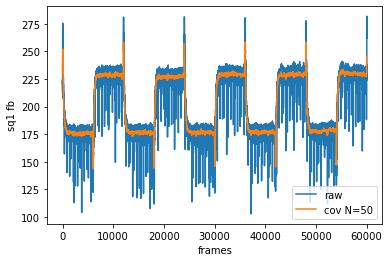

In [47]:
fdir = '/Users/bicep/docsnocloud/BK/tau/data/202111_tau/fasttau_ba_mce0_bias_1'
fn = 'fastdata_row18_rc2_offset10_bias200' # col11, row18, N6
mcen = os.path.join(fdir,fn)
mcer = '%.run'%mcen

f = mce_data.MCEFile(mcen)
info = vars(f)

y = f.Read(row_col=True,unfilter='DC').data
nr,nc,nt = y.shape
print((nr,nc,nt))

plt.figure()
plt.plot(y[0,3,:], label="raw")
plt.plot(np.convolve(y[0,3,:], np.ones(50)/50, mode='valid'), label="cov N=50")
plt.xlabel('frames')
plt.ylabel('sq1 fb')
plt.legend()

The MCEfile.Read can also read in a part of the time stream by specifying "start" and "count". This reduces the loading time when the data file gets large.

(1, 8, 10000)


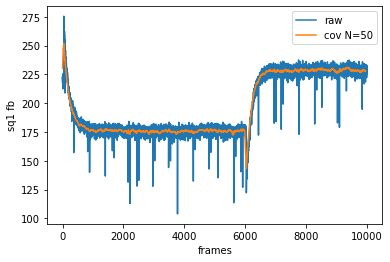

In [48]:
ys= f.Read(row_col=True,unfilter='DC',start=0,count=10000).data
nrs,ncs,nts = ys.shape
print((nrs,ncs,nts))

plt.figure()
plt.plot(ys[0,3,:], label="raw")
plt.plot(np.convolve(ys[0,3,:], np.ones(50)/50, mode='valid'), label="cov N=50")
plt.xlabel('frames')
plt.ylabel('sq1 fb')
plt.legend()

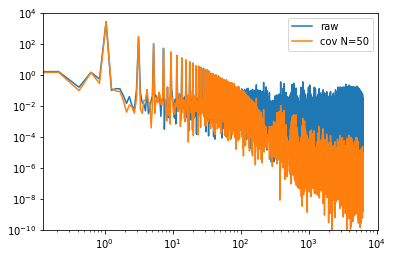

In [44]:
### freq = np.linspace(0,0.5*info["freq"],nt)

(f, S) = scipy.signal.periodogram(y[0,3,:], info["freq"], scaling='density')
(fcov, Scov) = scipy.signal.periodogram(np.convolve(y[0,3,:], np.ones(50)/50, mode='valid'), info["freq"], scaling='density')

plt.figure()
plt.loglog(f, S, label="raw")
plt.loglog(fcov, Scov, label="cov N=50")
plt.ylim(1e-10, 1e4)
plt.legend()